#  Projet  Crédit Bancaire


In [465]:
# les  librairies principale pour la gestion des données
import pandas as pd
import seaborn as sns
# la librairie pour normalizer les données par Z-Score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder# pour remplacerles variable categorique par variable numerique
from sklearn.model_selection import train_test_split #utilisé pour diviser les données en 25% test et 75% entrainement
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier #utilisé pour l'arbre de décision
from sklearn.ensemble import RandomForestClassifier #utilisé pour les forêts aléatoires afin de créer des instances
from sklearn.ensemble import AdaBoostClassifier #utilisé pour instancier le Adaboost
from sklearn.naive_bayes import GaussianNB # utilisé pour le naive baies 
#from sklearn.linear_model import LogisticRegression from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix) # pour utiliser des métriques de mesures comme la matrice de confusion et la surface sur la courbe

from sklearn.naive_bayes import GaussianNB #GaussianNB implémente l'algorithme de classification Gaussian Naive Bayes. La probabilité des caractéristiques est supposée être gaussienne 
from sklearn.metrics import roc_curve # Utiliser la métrique  sklearn.metrics.roc_curve de sklearn.metrics, Le ROC est créé en traçant le FPR (taux de faux positifs) par rapport au TPR (taux de vrais positifs) à différents seuils.
import matplotlib.pyplot as plt # pour utiliser Matlab pour dessiner les courbes
import numpy as np # numpy est utilisé à manipuler des matrices ou tableaux multidimensionnels.
import itertools #Fonctions créant des itérateurs pour un bouclage efficace
# ajouter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# import pickle # pas besoin


## Importation de la base des donnee


In [521]:
df = pd.read_csv("train4.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Nettoyage et Preparation

In [467]:
# verification des valeur manquqntes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [468]:
# Affichage des valeur manquqntes
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [469]:
# Verification des valeurs anormal et voir si il y a autre chose autre que les valeur statestique
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [470]:
# on costate les valeur sont normeaux

In [471]:
# verification des variables categorique
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002517,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [472]:
# decision  de nettoyage :
# on vas remplacer les valeurs categorique manquante par la valeur la plus repeter
# pour les valeur numerique on vas la remplacer par la valeur precedante
# on vas separer notre DF sur deux liste selon leur type
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()# j'utilise Transpose pour avoir les attribut
num_data=pd.DataFrame(num_data).transpose()

In [473]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [474]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [475]:
# donc pour les variable categorique on vas remplacer les valeur manquantes avec les valeur qui se repete de plus
# on utilise une formule lambda
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))# index 0 pour indexer la valeur qui se repete le plus
cat_data.isnull().sum().any()

False

In [476]:
# pour les variables num on vas remplacer les valeurs manquante par la valeur precedante de la meme colonne
num_data.fillna(method='bfill',inplace=True)# index 0 pour indexer la valeur qui se repete le plus
num_data.isnull().sum().any()

False

In [477]:
#transformationde la colonne [Loan_Status]; remplacer les Y par 1 et les n par 0
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)# supression de la colone
#on utilise map pour remplacer les valeurs
target=target.map(target_value)

In [478]:
# verification de la nouvelle DF
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [479]:
# on vas remplir les autres variable categorique avec 0 et 1 avec sklearn
le=LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [480]:
# on vas suprimmer la colonne Loan_ID
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [481]:
# jointure/concatination des deux tables et specifier la colonne target
x=pd.concat([cat_data,num_data],axis=1) #pour les variables independant pour dire si la personne aura un credit ou non
y=target # pour les variable dependante cad la reponse de la banque(Loan_Status)

In [482]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# A-   Analyse exploratoire
### pour comprendre meux nos variables pour la preparation des algorithmes de machine learning

In [483]:
# on commence par la variable cyble qui est target
target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

#### Rq: les credits accepte sont 422 , et les credit refuse sont 192

In [484]:
# concatenation de nos deux tables provisiore 
caracteristiques=pd.concat([cat_data,num_data,target],axis=1)

In [485]:
# verification de notre DF
caracteristiques.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1


###  On vas afficher la Matrice Heatmap pour verifier la correlation entre nos Variables

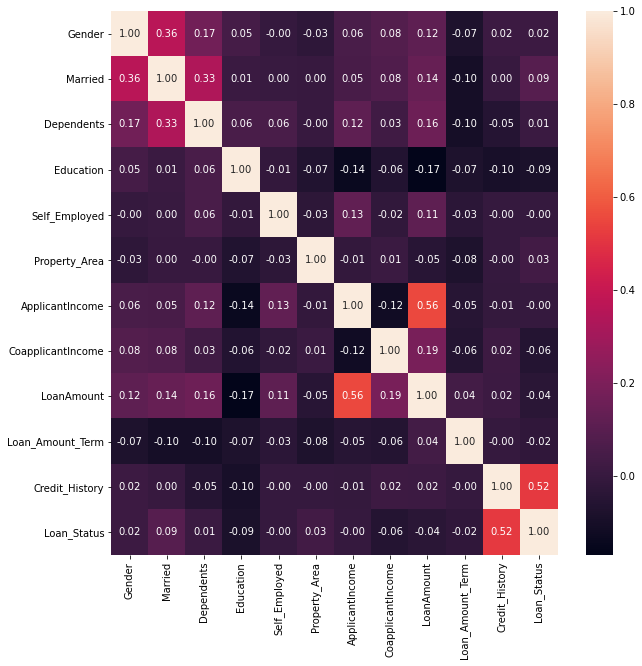

In [486]:
plt.figure(figsize=(10, 10))
sns.heatmap(caracteristiques.corr(), annot=True, fmt=".2f")
plt.show()

#### On constate qu'il n y a pas une forte correlation entre les variables juste, le Historique de credit a 52% avec la variable Loan_Status qui n'est pas considerer tres forte

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


le pourcentage des credit est accordees:0.3127035830618892
le pourcentage des credit est accordees:0.6872964169381107


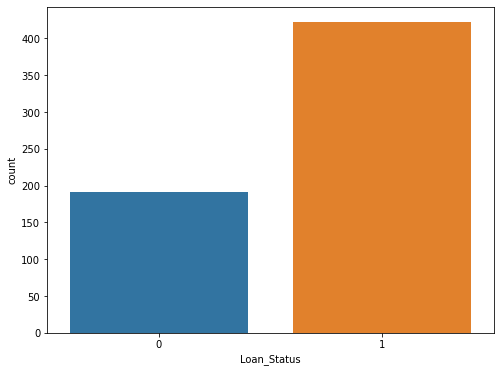

In [487]:
plt.figure(figsize=(8,6))
sns.countplot(target)
oui=target.value_counts()[0]/len(target)
non=target.value_counts()[1]/len(target)
print(f'le pourcentage des credit est accordees:{oui}')
print(f'le pourcentage des credit est accordees:{non}')

In [488]:
### on remarque que les credits accorde sont superieur au credit non accordees

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\anisa\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


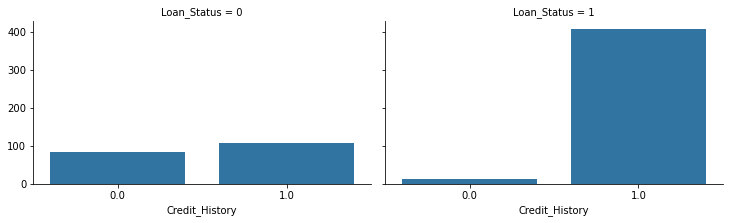

In [489]:
# historique de credit
grid=sns.FacetGrid(caracteristiques,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')

### on remarque selon le graphique ci-dessus que les clients qui ont un historique de credit il sont accepter part contre ceux qui n'on pas d'historique sont refuse
### dans le 1er graphique des credit non accordees nous constatons que il y a un equilibre entre les client qui ont un bon historique des credits et ceux qui ont un movais credits
### donc ci le client a un bon Historique il a plus de chance d'avoir un credit

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\anisa\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


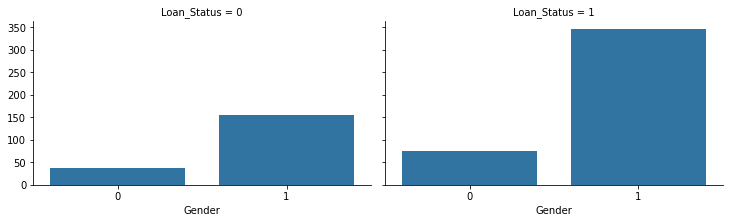

In [490]:
# la variable sexe
grid=sns.FacetGrid(caracteristiques,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Gender')

### on constate que les Hommes ont plus des credits acceptee

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\anisa\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


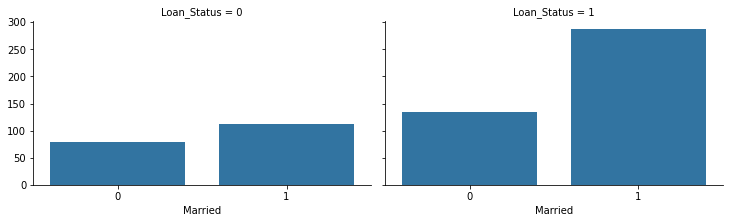

In [491]:
# verification par rapport a l'etat civil
grid=sns.FacetGrid(caracteristiques,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Married')

### on remarque les client mariee qui ont plus des credit accepter 
### mais il n a pas un grand impacte car il y a aussi des credit refusee en plus pour les marriee

C:\Users\anisa\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\anisa\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


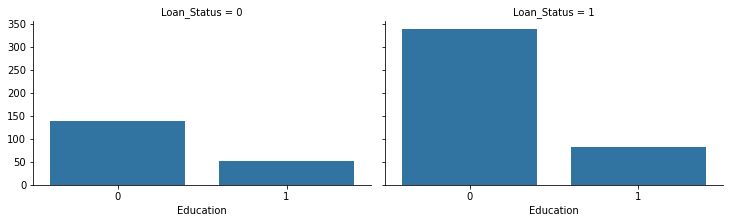

In [492]:
# Impacte Variable Education
grid=sns.FacetGrid(caracteristiques,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Education')

# les client qui ont fait des etudes on des credits acceptee plus que les autres

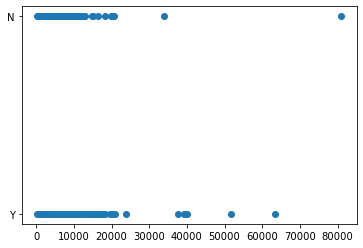

In [493]:
# l'impacte de revenue de client
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

### le revenue il n'a pas un impacte sur l'acceptation des credits

In [494]:
# median des variable numerique des credit accepte et credit refusee
caracteristiques.groupby("Loan_Status").median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1,1,0,0,0,1,3833.5,268.0,132.5,360.0,1.0
1,1,1,0,0,0,1,3812.5,1239.5,127.5,360.0,1.0


# B- Realisation du modele machine Learning 

In [495]:

# d'abord on divise notre base de donnee en une base des donnees test et une base de donnees d'entrainement
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(caracteristiques,y):
    X_train,X_test=caracteristiques.iloc[train],caracteristiques.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
print('X_train taille:',X_train.shape)
print('X_test taille:',X_test.shape)
print('y_train taille:',y_train.shape)
print('y_test taille:',y_test.shape)   

X_train taille: (491, 12)
X_test taille: (123, 12)
y_train taille: (491,)
y_test taille: (123,)


### -----------------------------------------------------------------------------------------------------------------------------------------------------
## 1/ Application des trois Modeles simple : Logistic Regression,K-Nearest Neighbours et DecissionTree 
## pour notre probleme de regression

In [496]:




#specification des modele:

models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}

#definition de la fonction de precision:
def accu(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'la precision est: {acc}')
# definition de la fonction d'application des modeles:
def train_test_eval(models,X_train,y_train,X_test,y_test): # les variable d'entree sont :models,X_train,y_train,X_test,y_test
    for name,model in models.items(): # pour parcourir le dictionnaire avec le nom et model
        print(name,':')
        model.fit(X_train,y_train)# pour faire l'entrainement du modele
        accu(y_test,model.predict(X_test))# on fait l'evalution
        print('_'*30)
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision est: 1.0
______________________________
KNeighborsClassifier :
la precision est: 0.6504065040650406
______________________________
DecisionTreeClassifier :
la precision est: 1.0
______________________________


C:\Users\anisa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [497]:
# creation d'une nouvelle variable:
caracteristiques_2=caracteristiques[['Credit_History','Gender','Married','ApplicantIncome','CoapplicantIncome']]

In [498]:
# Affichage
caracteristiques_2.head()

,Credit_History,Gender,Married,ApplicantIncome,CoapplicantIncome
0,1.0,1,0,5849.0,0.0
1,1.0,1,1,4583.0,1508.0
2,1.0,1,1,3000.0,0.0
3,1.0,1,1,2583.0,2358.0
4,1.0,1,0,6000.0,0.0


In [499]:
# d'abord on divise notre base de donnee en une base des donnees test et une base de donnees d'entrainement
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(caracteristiques_2,y):
    X_train,X_test=caracteristiques_2.iloc[train],caracteristiques_2.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
print('X_train taille:',X_train.shape)
print('X_test taille:',X_test.shape)
print('y_train taille:',y_train.shape)
print('y_test taille:',y_test.shape)   

X_train taille: (491, 5)
X_test taille: (123, 5)
y_train taille: (491,)
y_test taille: (123,)


In [500]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision est: 0.8536585365853658
______________________________
KNeighborsClassifier :
la precision est: 0.6585365853658537
______________________________
DecisionTreeClassifier :
la precision est: 0.8455284552845529
______________________________


##### Grapgique Arbre de decision 
###### Methode 1

In [501]:
#!pip install jyquickhelper
from jyquickhelper import RenderJsVis # librairie qui affiche l'arbre de decision dynamique avec souris
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="arbre.dot")
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
dot = export_graphviz(clf, out_file=None, feature_names=X_train.columns)
RenderJsVis(dot=dot, height="700px", layout='hierarchical')

##### Methode 2

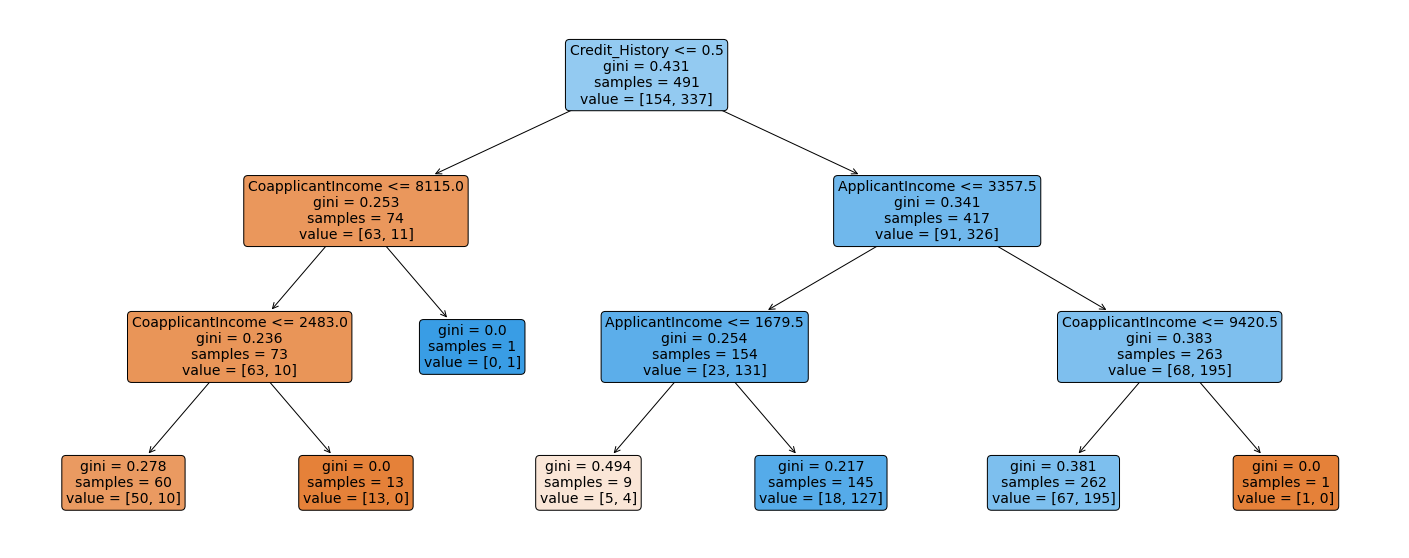

In [502]:

# affichage de tree : par matplotlib

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)



plt.figure(figsize=(25,10))
a = plot_tree(clf,
filled=True,
rounded=True,
fontsize=14, feature_names=X_train.columns)


#### Remarque:
#### On constate que le modele le plus performant est LogisticRegression et DecisionTreeClassifier

### ---------------------------------------------------------------------------------------------------------
## 2/ Entrainement de 5 modèles de classification :
###   1 - Arbre de decision
###   2 - Forêt d’arbres décisionnels (Random Forest)
###   3 - Classification bayésienne naïve
###   4 - Bagging
###   5 - AdaBoost

###### Definition des fonctions pour calculer le score AUC et Dessiner la courbe AUC et calculer le FPR et TPR

In [503]:
# Defenition des fonctions a utiliser:
# 1)fonction utilisé pour calculer le score AUC (ROC) 

def get_auc_scores(clf, X_train, X_test, y_train, y_test):
    y_train_score = clf.predict_proba(X_train)[:, 1]
    y_test_score = clf.predict_proba(X_test)[:, 1]
    auc_train = roc_auc_score(y_train, y_train_score)
    auc_test = roc_auc_score(y_test, y_test_score)
    print(f"""
        Training AUC: {auc_train}
        Testing AUC: {auc_test}""")
    return y_test_score

# 2) fonction utilisé pour dessiner la courbe AUC (ROC)  et calculer les fpr et tpr 

def plot_roc_curve(y_test, y_test_score):
 fpr, tpr, _ = roc_curve(y_test, y_test_score)
 roc_auc = auc(fpr, tpr)
 plt.figure()
 plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
 plt.plot([0, 1], [0, 1], "k-")
 plt.xlim([0.0, 1.0])
 plt.ylim([0.0, 1.05])
 plt.xlabel("False Positive Rate")
 plt.ylabel("True Positive Rate")
 plt.title("Receiver operating characteristic")
 plt.legend(loc="lower right")
 plt.show()

#fonction utilisé pour dessiner la matrice de confusion (cm= confusion matrix) 
def show_cm(y_true, y_pred, class_names=None, model_name=None):
      cf = confusion_matrix(y_true, y_pred)
      plt.imshow(cf, cmap=plt.cm.Blues)
      if model_name:
          plt.title("Confusion Matrix: {}".format(model_name))
      else:
          plt.title("Confusion Matrix")
          plt.ylabel("True Label")
          plt.xlabel("Predicted Label")
      if class_names:
          tick_marks = np.arange(len(class_names))
          plt.xticks(tick_marks, class_names)
          plt.yticks(tick_marks, class_names)
      else:
          class_names = set(y_true)
          tick_marks = np.arange(len(class_names))
          plt.xticks(tick_marks, class_names)
          plt.yticks(tick_marks, class_names)
          thresh = cf.max() / 2.0
      for i, j in itertools.product(range(cf.shape[0]),
                                      range(cf.shape[1])):
          plt.text(j, i, cf[i, j],
                    horizontalalignment="center",
                    color="white" if cf[i, j] > thresh else "black",
                    )
          plt.colorbar()

from sklearn.ensemble import BaggingClassifier #utilisé pour instancier l'algorithme du Bagging 
from sklearn.tree import DecisionTreeClassifier #utilisé pour instancier l'arbre de décision
from matplotlib.colors import ListedColormap #
#Le module matplotlib.colors est utilisé pour convertir les arguments de couleur ou de nombres en RGBA ou RGB. 
#Ce module est utilisé pour la mise en correspondance des nombres avec les couleurs ou la conversion des spécifications 
#de couleur dans un tableau 1-D de couleurs, également appelé Colormap
# Pour résumer, matplotlib.colors est utilisé pour ajouter une Colormap à partir de matplotlib.colors

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


######  1- Arbre de decision

[0.         0.39473684 1.        ]
[0.         0.75294118 1.        ]
=== la matrice de confusion pour l'algorithme Arbre de décision ===
[[23 15]
 [21 64]]


=== le rapport de classification pour l'algorithme Arbre de décision ===
              precision    recall  f1-score   support

           0       0.52      0.61      0.56        38
           1       0.81      0.75      0.78        85

    accuracy                           0.71       123
   macro avg       0.67      0.68      0.67       123
weighted avg       0.72      0.71      0.71       123


        Training AUC: 0.999845851477899
        Testing AUC: 0.6826625386996903


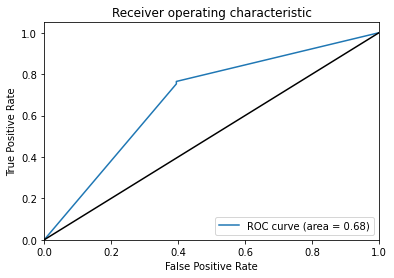

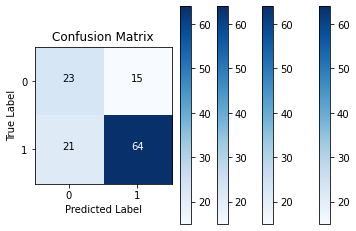

In [504]:

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
Y_train_dec = dec_tree.predict(X_train)

#*********************************************************************************************

#Predict the response for test dataset
Y_pred_dec = dec_tree.predict(X_test)
#*********************************************************************************************

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, Y_pred_dec)
print (fpr)
print (tpr)

print("=== la matrice de confusion pour l'algorithme Arbre de décision ===")
print(confusion_matrix(y_test, Y_pred_dec))
print('\n')
print("=== le rapport de classification pour l'algorithme Arbre de décision ===")
print(classification_report(y_test, Y_pred_dec))

Y_test_score = get_auc_scores(dec_tree, X_train, X_test, y_train, y_test)
plot_roc_curve(y_test, Y_test_score)
show_cm(y_test, Y_test_score.round(), class_names=None, model_name=None)

# j'ai ajouter .round() apres Y_test_score pour eviter le msg d'erreur (Classification metrics can't handle a mix of binary and continuous targets)


###### Evaluation du modele: 
Selon notre courbe ROC on costate que 
Nous constatons que notre surface du courbe =66% <pr>
    
selon notre matrice de confusion nous constatons que notre  TPR= 63 et le TNR=22,par contre notre FPR= 16 et le FNR=22
    
En conclusion notre modele est bon mais pas excellent

######  2- Random Forest

[0.         0.39473684 1.        ]
[0.         0.84705882 1.        ]
 
=== la matrice de confusion pour l'algorithme Forêt d’arbres décisionnels (Random Forest) ===
 
[[23 15]
 [13 72]]


=== le rapport de classification pour l'algorithme Forêt d’arbres décisionnels (Random Forest) ===
 
              precision    recall  f1-score   support

           0       0.64      0.61      0.62        38
           1       0.83      0.85      0.84        85

    accuracy                           0.77       123
   macro avg       0.73      0.73      0.73       123
weighted avg       0.77      0.77      0.77       123

_________________________  AUC  ___________________

        Training AUC: 0.999845851477899
        Testing AUC: 0.8065015479876161


_________________________ Courbe ROC  ___________________


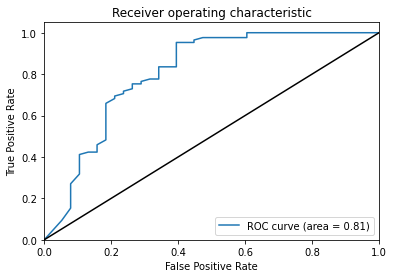

_________________________ Matrice de confusion ___________________


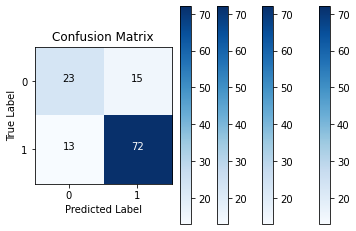

In [505]:

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_train_rfc = rfc.predict(X_train)

#*********************************************************************************************
#*********************************************************************************************
#*********************************************************************************************
#Predict the response for test dataset
y_pred_rfc=rfc.predict(X_test)
#*********************************************************************************************
#*********************************************************************************************
#*********************************************************************************************
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_rfc)
print (fpr)
print (tpr)

print(" ")
print("=== la matrice de confusion pour l'algorithme Forêt d’arbres décisionnels (Random Forest) ===")
print(" ")
print(confusion_matrix(y_test, y_pred_rfc))
print('\n')
print("=== le rapport de classification pour l'algorithme Forêt d’arbres décisionnels (Random Forest) ===")
print(" ")
print(classification_report(y_test, y_pred_rfc))
print("_________________________  AUC  ___________________")
y_test_score_rfc = get_auc_scores(rfc, X_train, X_test, y_train, y_test)
print('\n')
print("_________________________ Courbe ROC  ___________________")
plot_roc_curve(y_test, y_test_score_rfc)

show_cm(y_test, y_pred_rfc, class_names=None, model_name=None)

print("_________________________ Matrice de confusion ___________________")





######  Evaluation du Modele: <pr>

Selon notre courbe ROC on costate que Nous constatons que notre AUC  (surface sous la courbe ROC) =81%

selon notre matrice de confusion nous constatons que notre TPR= 74 et le TNR=24,par contre notre FPR= 14 et le FNR=11

En conclusion notre modele est tres bon

######  3 - Classification bayésienne naïve

[0.         0.42105263 1.        ]
[0.         0.95294118 1.        ]
=== la matrice de confusion pour l'algorithme Classification bayésienne naïve ===
[[22 16]
 [ 4 81]]


=== le rapport de classification pour l'algorithme Classification bayésienne naïve ===
              precision    recall  f1-score   support

           0       0.85      0.58      0.69        38
           1       0.84      0.95      0.89        85

    accuracy                           0.84       123
   macro avg       0.84      0.77      0.79       123
weighted avg       0.84      0.84      0.83       123


        Training AUC: 0.731087903194728
        Testing AUC: 0.7789473684210526


_________________________ Courbe ROC  ___________________


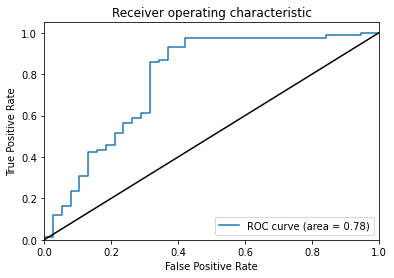

_________________________ Matrice de confusion ___________________


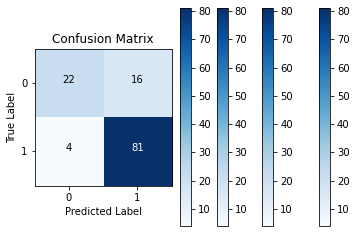

In [506]:

gaussianModel = GaussianNB()
gaussianModel.fit(X_train, y_train)
Y_train_gauss = gaussianModel.predict(X_train)
#*********************************************************************************************
#*********************************************************************************************
#*********************************************************************************************
#Predict the response for test dataset
Y_pred_gauss = gaussianModel.predict(X_test)
#*********************************************************************************************
#*********************************************************************************************
#*********************************************************************************************
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, Y_pred_gauss)
print (fpr)
print (tpr)



print("=== la matrice de confusion pour l'algorithme Classification bayésienne naïve ===")
print(confusion_matrix(y_test, Y_pred_gauss))
print('\n')
print("=== le rapport de classification pour l'algorithme Classification bayésienne naïve ===")
print(classification_report(y_test, Y_pred_gauss))

Y_test_score_gauss = get_auc_scores(gaussianModel, X_train, X_test, y_train, y_test)
print('\n')
print("_________________________ Courbe ROC  ___________________")
plot_roc_curve(y_test, Y_test_score_gauss)
show_cm(y_test, Y_pred_gauss, class_names=None, model_name=None)

print("_________________________ Matrice de confusion ___________________")

######  Evaluation du Modele: <pr>

Selon notre courbe ROC on costate que Nous constatons que notre AUC surface sous la courbe ROC =78%

selon notre matrice de confusion nous constatons que notre TPR= 81 et le TNR=22,par contre notre FPR= 16 et le FNR=4

En conclusion notre modele est mieux que l'arbre de decision

##### 4 - Bagging 

[0.         0.42105263 1.        ]
[0.         0.95294118 1.        ]
=== la matrice de confusion pour l'algorithme Bagging ===
[[22 16]
 [ 4 81]]


=== le rapport de classification pour l'algorithme Bagging ===
              precision    recall  f1-score   support

           0       0.85      0.58      0.69        38
           1       0.84      0.95      0.89        85

    accuracy                           0.84       123
   macro avg       0.84      0.77      0.79       123
weighted avg       0.84      0.84      0.83       123


        Training AUC: 0.9355659177617635
        Testing AUC: 0.824922600619195


_________________________ Courbe ROC  ___________________


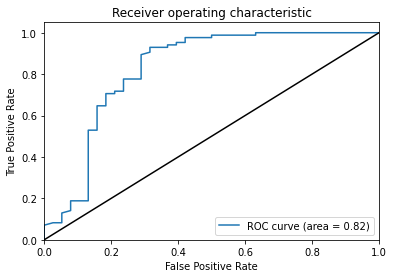

_________________________ Matrice de confusion ___________________


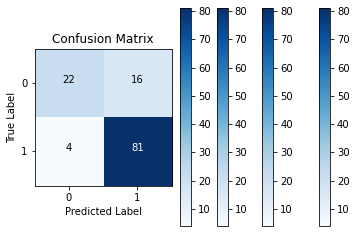

In [507]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

#Bagging 500 trees
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, oob_score=False, bootstrap=True, random_state=42)
bag_clf = bag_clf.fit(X_train, y_train)
#*********************************************************************************************

#Predict the response for test dataset
Y_pred_bag_clf = bag_clf.predict(X_test)
#*********************************************************************************************


from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, Y_pred_bag_clf)
print (fpr)
print (tpr)


print("=== la matrice de confusion pour l'algorithme Bagging ===")
print(confusion_matrix(y_test, Y_pred_bag_clf))
print('\n')
print("=== le rapport de classification pour l'algorithme Bagging ===")
print(classification_report(y_test, Y_pred_bag_clf))


Y_test_bag_clf = get_auc_scores(bag_clf, X_train, X_test, y_train, y_test)
print('\n')
print("_________________________ Courbe ROC  ___________________")
plot_roc_curve(y_test, Y_test_bag_clf)
show_cm(y_test, Y_pred_bag_clf, class_names=None, model_name=None)
print("_________________________ Matrice de confusion ___________________")



######  Evaluation du Modele: <pr>

Selon notre courbe ROC on costate que Nous constatons que notre AUC surface sous la courbe ROC =82%

selon notre matrice de confusion nous constatons que notre TPR= 81 et le TNR=22,par contre notre FPR= 16 et le FNR=4

En conclusion notre modele est excellent 

###### 5 - AdaBoost 

[0.         0.42105263 1.        ]
[0.         0.92941176 1.        ]
=== la matrice de confusion pour l'algorithme AdaBoost ===
[[22 16]
 [ 6 79]]


=== le rapport de classification pour l'algorithme AdaBoost ===
              precision    recall  f1-score   support

           0       0.79      0.58      0.67        38
           1       0.83      0.93      0.88        85

    accuracy                           0.82       123
   macro avg       0.81      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123


        Training AUC: 0.8516031446298509
        Testing AUC: 0.7230650154798762


_________________________ Courbe ROC  ___________________


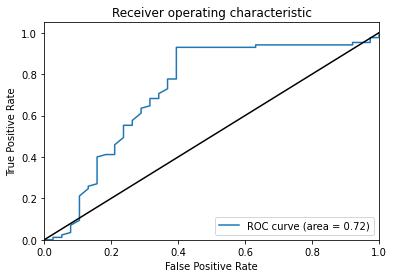

_________________________ Matrice de confusion ___________________


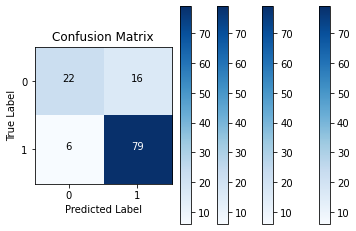

In [508]:

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

Y_train_abc = model.predict(X_train)

#*********************************************************************************************
#Predict the response for test dataset
Y_pred_abc = model.predict(X_test)
#*********************************************************************************************


from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, Y_pred_abc)
print (fpr)
print (tpr)



print("=== la matrice de confusion pour l'algorithme AdaBoost ===")
print(confusion_matrix(y_test, Y_pred_abc))
print('\n')
print("=== le rapport de classification pour l'algorithme AdaBoost ===")
print(classification_report(y_test, Y_pred_abc))


Y_test_score_abc = get_auc_scores(model, X_train, X_test, y_train, y_test)
print('\n')
print("_________________________ Courbe ROC  ___________________")
plot_roc_curve(y_test, Y_test_score_abc)
show_cm(y_test, Y_pred_abc, class_names=None, model_name=None)
print("_________________________ Matrice de confusion ___________________")



######  Evaluation du Modele: <pr>

Selon notre courbe ROC on costate que Nous constatons que notre AUC surface sous la courbe ROC =72%

selon notre matrice de confusion nous constatons que notre TPR= 79 et le TNR=22,par contre notre FPR= 16 et le FNR=6

En conclusion notre modele est Bon 

##### Partie 3
###### - Identification des meilleurs caracteristiques

0     0.000000
4     0.000000
5     0.000000
8     0.000000
2     0.001502
7     0.004489
6     0.008107
3     0.010414
1     0.015543
9     0.018379
10    0.142166
11    0.622062
dtype: float64

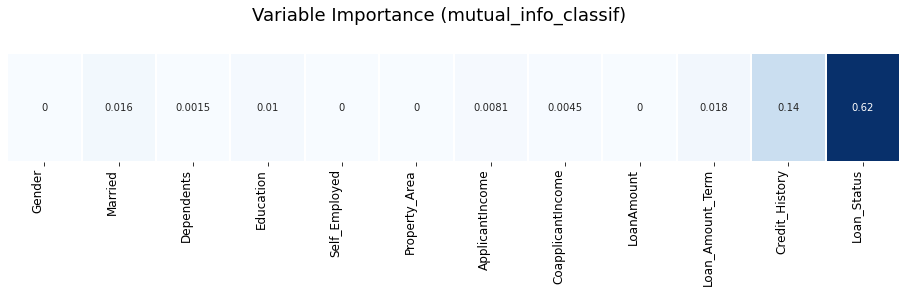

In [509]:


from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


mutual_information = mutual_info_classif(X, y)

plt.subplots(1, figsize=(16, 2))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X.columns[0:], rotation=90, ha='right', fontsize=12)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)
pass
s = pd.Series(mutual_information)
s.sort_values(ascending=True)


In [510]:
caracteristiques.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1


In [511]:
caracteristiques.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

###### - Selection des  caracteristiques tops 5

In [512]:


x = caracteristiques[['Gender', 'Married', 'Dependents','Loan_Amount_Term','Credit_History', 'Loan_Status']].copy()
y = x["Loan_Status"]      
x = x.drop('Loan_Status', axis=1)
feature_scaler = StandardScaler()
x = pd.DataFrame(feature_scaler.fit_transform(x), columns=x.columns)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.75,test_size=0.25, random_state=101)




###  - Entrainement des  5 modèles de classification sur l'ensemble de données normalisées avec seulement les top 5 caracteristiques selectionnés.

###  1 - Arbre de decision
###  2 - Forêt d’arbres décisionnels (Random Forest)
###   3 - Classification bayésienne naïve
###  4 - Bagging
###  5 - AdaBoost



##### 1 - Arbre de decision

[0.         0.56363636 1.        ]
[0.         0.91919192 1.        ]
=== la matrice de confusion pour l'algorithme Arbre de décision ===
[[24 31]
 [ 8 91]]


=== le rapport de classification pour l'algorithme Arbre de décision ===
              precision    recall  f1-score   support

           0       0.75      0.44      0.55        55
           1       0.75      0.92      0.82        99

    accuracy                           0.75       154
   macro avg       0.75      0.68      0.69       154
weighted avg       0.75      0.75      0.73       154


        Training AUC: 0.8161171498949176
        Testing AUC: 0.6882460973370064


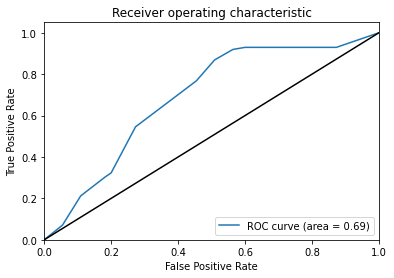

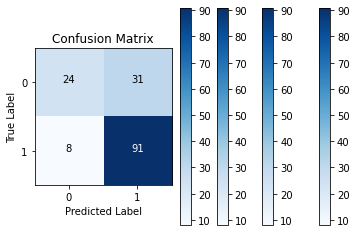

In [513]:

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, Y_train)
Y_train_dec = dec_tree.predict(X_train)


#Predict the response for test dataset
Y_pred_dec = dec_tree.predict(X_test)

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_dec)
print (fpr)
print (tpr)



print("=== la matrice de confusion pour l'algorithme Arbre de décision ===")
print(confusion_matrix(Y_test, Y_pred_dec))
print('\n')
print("=== le rapport de classification pour l'algorithme Arbre de décision ===")
print(classification_report(Y_test, Y_pred_dec))

Y_test_score = get_auc_scores(dec_tree, X_train, X_test, Y_train, Y_test)
plot_roc_curve(Y_test, Y_test_score)
show_cm(Y_test, Y_pred_dec, class_names=None, model_name=None)



######  Evaluation du Modele: <pr>

Selon notre courbe ROC on costate que Nous constatons que notre AUC surface sous la courbe ROC =68%

selon notre matrice de confusion nous constatons que notre TPR= 90 et le TNR=24,par contre notre FPR= 31 et le FNR=9

En conclusion notre modele n'est passable

#####  2 - Forêt d’arbres décisionnels (Random Forest)

[0.         0.56363636 1.        ]
[0.         0.93939394 1.        ]
=== la matrice de confusion pour l'algorithme Forêt d’arbres décisionnels (Random Forest) ===
[[24 31]
 [ 6 93]]


=== le rapport de classification pour l'algorithme Forêt d’arbres décisionnels (Random Forest) ===
              precision    recall  f1-score   support

           0       0.80      0.44      0.56        55
           1       0.75      0.94      0.83        99

    accuracy                           0.76       154
   macro avg       0.78      0.69      0.70       154
weighted avg       0.77      0.76      0.74       154


        Training AUC: 0.808863076540643
        Testing AUC: 0.7006427915518826


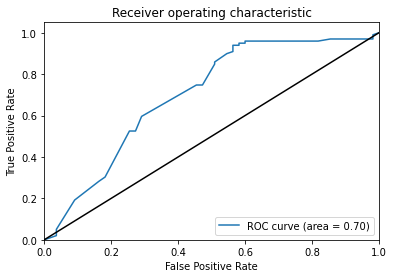

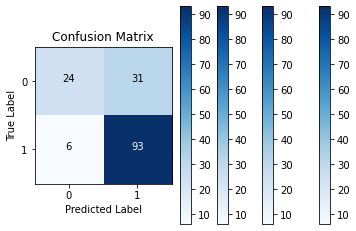

In [514]:

rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
Y_train_rfc = rfc.predict(X_train)

#*********************************************************************************************
#*********************************************************************************************
#*********************************************************************************************
#Predict the response for test dataset
Y_pred_rfc=rfc.predict(X_test)
#*********************************************************************************************
#*********************************************************************************************
#*********************************************************************************************
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_rfc)
print (fpr)
print (tpr)


print("=== la matrice de confusion pour l'algorithme Forêt d’arbres décisionnels (Random Forest) ===")
print(confusion_matrix(Y_test, Y_pred_rfc))
print('\n')
print("=== le rapport de classification pour l'algorithme Forêt d’arbres décisionnels (Random Forest) ===")
print(classification_report(Y_test, Y_pred_rfc))

Y_test_score_rfc = get_auc_scores(rfc, X_train, X_test, Y_train, Y_test)
plot_roc_curve(Y_test, Y_test_score_rfc)
show_cm(Y_test, Y_pred_rfc, class_names=None, model_name=None)




######  Evaluation du Modele: <pr>

Selon notre courbe ROC on costate que Nous constatons que notre AUC surface sous la courbe ROC =69%

selon notre matrice de confusion nous constatons que notre TPR= 93 et le TNR=23,par contre notre FPR= 32 et le FNR=6

En conclusion notre modele n'est satisfaisant

##### 3 - Classification bayésienne naïve

[0.         0.56363636 1.        ]
[0.         0.96969697 1.        ]
=== la matrice de confusion pour l'algorithme Classification bayésienne naïve ===
[[24 31]
 [ 3 96]]


=== le rapport de classification pour l'algorithme Classification bayésienne naïve ===
              precision    recall  f1-score   support

           0       0.89      0.44      0.59        55
           1       0.76      0.97      0.85        99

    accuracy                           0.78       154
   macro avg       0.82      0.70      0.72       154
weighted avg       0.80      0.78      0.76       154


        Training AUC: 0.7271022123793812
        Testing AUC: 0.7504132231404959


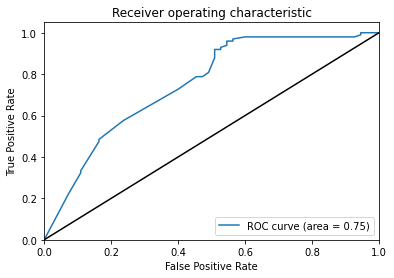

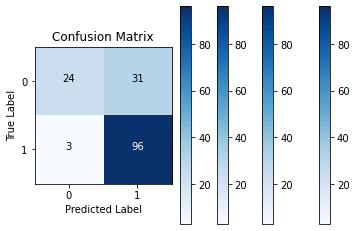

In [515]:

gaussianModel = GaussianNB()
gaussianModel.fit(X_train, Y_train)
Y_train_gauss = gaussianModel.predict(X_train)
#*********************************************************************************************
#*********************************************************************************************
#*********************************************************************************************
#Predict the response for test dataset
Y_pred_gauss = gaussianModel.predict(X_test)
#*********************************************************************************************
#*********************************************************************************************
#*********************************************************************************************
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_gauss)
print (fpr)
print (tpr)



print("=== la matrice de confusion pour l'algorithme Classification bayésienne naïve ===")
print(confusion_matrix(Y_test, Y_pred_gauss))
print('\n')
print("=== le rapport de classification pour l'algorithme Classification bayésienne naïve ===")
print(classification_report(Y_test, Y_pred_gauss))

Y_test_score_gauss = get_auc_scores(gaussianModel, X_train, X_test, Y_train, Y_test)
plot_roc_curve(Y_test, Y_test_score_gauss)
show_cm(Y_test, Y_pred_gauss, class_names=None, model_name=None)



######  Evaluation du Modele: <pr>

Selon notre courbe ROC on costate que Nous constatons que notre AUC surface sous la courbe ROC =75%

selon notre matrice de confusion nous constatons que notre TPR= 96 et le TNR=24,par contre notre FPR= 31 et le FNR=3

En conclusion notre modele est tres bon

##### 4 - Bagging 

[0.         0.56363636 1.        ]
[0.         0.94949495 1.        ]
=== la matrice de confusion pour l'algorithme Bagging ===
[[24 31]
 [ 5 94]]


=== le rapport de classification pour l'algorithme Bagging ===
              precision    recall  f1-score   support

           0       0.83      0.44      0.57        55
           1       0.75      0.95      0.84        99

    accuracy                           0.77       154
   macro avg       0.79      0.69      0.71       154
weighted avg       0.78      0.77      0.74       154


        Training AUC: 0.7919369053806693
        Testing AUC: 0.7083562901744721


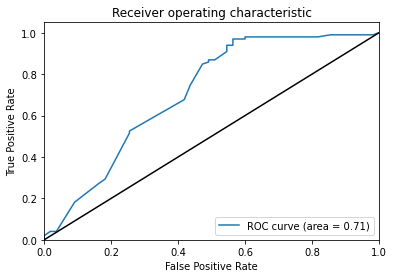

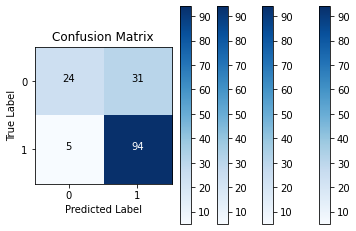

In [516]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

#Bagging 500 trees
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, oob_score=False, bootstrap=True, random_state=42)
bag_clf = bag_clf.fit(X_train, Y_train)
#*********************************************************************************************
#*********************************************************************************************
#*********************************************************************************************
#Predict the response for test dataset
Y_pred_bag_clf = bag_clf.predict(X_test)
#*********************************************************************************************
#*********************************************************************************************
#*********************************************************************************************

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_bag_clf)
print (fpr)
print (tpr)


print("=== la matrice de confusion pour l'algorithme Bagging ===")
print(confusion_matrix(Y_test, Y_pred_bag_clf))
print('\n')
print("=== le rapport de classification pour l'algorithme Bagging ===")
print(classification_report(Y_test, Y_pred_bag_clf))


Y_test_bag_clf = get_auc_scores(bag_clf, X_train, X_test, Y_train, Y_test)
plot_roc_curve(Y_test, Y_test_bag_clf)
show_cm(Y_test, Y_pred_bag_clf, class_names=None, model_name=None)




######  Evaluation du Modele: <pr>

Selon notre courbe ROC on costate que Nous constatons que notre AUC surface sous la courbe ROC =71%

selon notre matrice de confusion nous constatons que notre TPR= 94 et le TNR=24,par contre notre FPR= 31 et le FNR=5

En conclusion notre modele est bon

##### 5 - AdaBoost 

[0.         0.56363636 1.        ]
[0.         0.92929293 1.        ]
=== la matrice de confusion pour l'algorithme AdaBoost ===
[[24 31]
 [ 7 92]]


=== le rapport de classification pour l'algorithme AdaBoost ===
              precision    recall  f1-score   support

           0       0.77      0.44      0.56        55
           1       0.75      0.93      0.83        99

    accuracy                           0.75       154
   macro avg       0.76      0.68      0.69       154
weighted avg       0.76      0.75      0.73       154


        Training AUC: 0.7669544191091726
        Testing AUC: 0.729384756657484


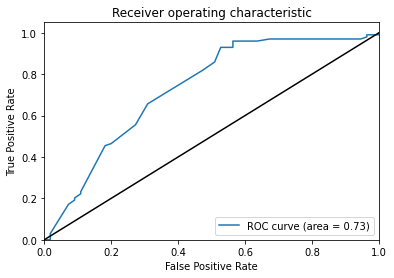

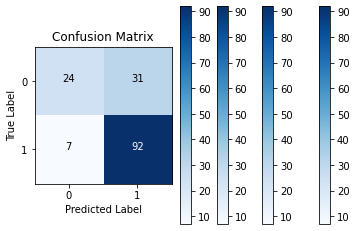

In [517]:

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, Y_train)

Y_train_abc = model.predict(X_train)

#*********************************************************************************************
#*********************************************************************************************
#*********************************************************************************************
#Predict the response for test dataset
Y_pred_abc = model.predict(X_test)
#*********************************************************************************************
#*********************************************************************************************
#*********************************************************************************************

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_abc)
print (fpr)
print (tpr)



print("=== la matrice de confusion pour l'algorithme AdaBoost ===")
print(confusion_matrix(Y_test, Y_pred_abc))
print('\n')
print("=== le rapport de classification pour l'algorithme AdaBoost ===")
print(classification_report(Y_test, Y_pred_abc))


Y_test_score_abc = get_auc_scores(model, X_train, X_test, Y_train, Y_test)
plot_roc_curve(Y_test, Y_test_score_abc)
show_cm(Y_test, Y_pred_abc, class_names=None, model_name=None)


######  Evaluation du Modele: <pr>

Selon notre courbe ROC on costate que Nous constatons que notre AUC surface sous la courbe ROC =73%

selon notre matrice de confusion nous constatons que notre TPR= 92 et le TNR=24,par contre notre FPR= 31 et le FNR=7

En conclusion notre modele est  bon

# -------------------------------------------------------------------------------------------------
# Conclusion:
ce que nous pourvons interpreter a travers les modeles elabore que l'algorithme bagging est le plus performant avec notre base de donnees hors selon notre courbe ROC on costate que notre AUC surface sous la courbe et de  ROC =82%
et selon notre matrice de confusion nous constatons que notre TPR= 81 valeurs et le TNR=22 valeurs ,par contre notre FPR= 16 valeurs et le FNR=4 valeurs

En conclusion notre modele est excellent avec un TPR= 95% et une precision de 84%

En deuxieme lieu nous avons le Random Forest, Selon notre courbe ROC on costate que Nous constatons que notre AUC  (surface sous la courbe ROC) =81%
et dans  matrice de confusion nous constatons que notre TPR= 74 et le TNR=24,par contre notre FPR= 14 et le FNR=11
en conclusion le modele Random Forest et tres bon  aussi avec un TPR de 85% et une precision de 77%